In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
whoop_data = pd.read_csv("whoop.data.csv")

In [3]:
del whoop_data['Blood oxygen %']
del whoop_data['Skin temp (celsius)']
del whoop_data['Cycle timezone']
del whoop_data['Cycle end time']
del whoop_data['Sleep onset']
del whoop_data['Wake onset']

In [4]:
whoop_data.replace('', np.nan, inplace=True)
whoop_data.dropna(inplace=True)

In [5]:
len(whoop_data)

371

In [6]:
whoop_data['Date'] = pd.to_datetime(whoop_data['Cycle start time']).dt.date
whoop_data['Cycle start time'] = pd.to_datetime(whoop_data['Cycle start time'])

In [7]:
whoop_data.drop(whoop_data[(whoop_data['Day Strain'] < 1.0)].index,inplace=True)

In [8]:
whoop_data['Day'] = pd.to_datetime(whoop_data['Cycle start time']).dt.dayofweek

In [9]:
def filter(x):
    if x == 0:
        return 'Monday'
    elif x == 1:
        return 'Tuesday'
    elif x == 2:
        return 'Wednesday'
    elif x == 3:
        return 'Thursday'
    elif x == 4:
        return 'Friday'
    elif x == 5:
        return 'Saturday'
    elif x == 6:
        return 'Sunday'

whoop_data['DayofWeek'] = whoop_data['Day'].apply(filter)

In [25]:
def color(x):
    if x >= 67:
        return 'Green'
    elif x >= 34 and x <= 66:
        return 'Yellow'
    else:
        return 'Red'

whoop_data['RecoveryColor'] = whoop_data['RecoveryScore'].apply(color)

In [86]:
def score(x):
    if x >= 40:
        return 1
    else:
        return 0

whoop_data['RecoveryFeeling'] = whoop_data['RecoveryScore'].apply(score)

In [90]:
def scores(x):
    if x >= 90:
        return 1
    else:
        return 0

whoop_data['RecoveryBestFeeling'] = whoop_data['RecoveryScore'].apply(scores)

In [87]:
whoop_data.rename(columns={'Cycle start time':'CycleStartTime','Recovery score %':'RecoveryScore','Resting heart rate (bpm)':'RHR','Heart rate variability (ms)':'HRV','Day Strain':'DayStrain','Energy burned (cal)':'CaloriesBurned','Max HR (bpm)':'MaxHR','Average HR (bpm)':'AverageHR','Sleep performance %':'SleepPerformance','Respiratory rate (rpm)':'RespiratoryRate','Asleep duration (min)':'SleepTime','In bed duration (min)':'InBedTime','Light sleep duration (min)':'LightSleep','Deep (SWS) duration (min)':'DeepSleep','REM duration (min)':'REMSleep','Awake duration (min)':'AwakeTime','Sleep need (min)':'SleepNeed','Sleep debt (min)':'SleepDebt','Sleep efficiency %':'SleepEfficiency'},inplace=True)

In [98]:
print(whoop_data.keys())

Index(['CycleStartTime', 'RecoveryScore', 'RHR', 'HRV', 'DayStrain',
       'CaloriesBurned', 'MaxHR', 'AverageHR', 'SleepPerformance',
       'RespiratoryRate', 'SleepTime', 'InBedTime', 'LightSleep', 'DeepSleep',
       'REMSleep', 'AwakeTime', 'SleepNeed', 'SleepDebt', 'SleepEfficiency',
       'Date', 'Day', 'DayofWeek', 'RecoveryColor', 'RecoveryFeeling',
       'RecoveryBestFeeling'],
      dtype='object')


In [93]:
whoop_data.to_csv('whoop_data2.csv', index=False)

# EDA

In [12]:
whoop_data.describe()

,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Day Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Day
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,64.167568,54.089189,71.251351,10.886757,2536.627027,162.372973,70.202703,83.216216,16.714595,438.143243,482.194595,198.524324,86.924324,152.694595,44.037838,521.656757,41.932432,90.905405,3.159459
std,20.216418,2.702030,12.105859,3.127128,392.859997,16.202523,4.483574,15.423621,0.532828,84.289722,95.204131,51.271325,20.743882,42.312442,23.684779,43.485144,36.335135,4.195652,2.018607
min,1.000000,46.000000,19.000000,2.300000,966.000000,108.000000,59.000000,11.000000,15.000000,51.000000,69.000000,49.000000,0.000000,0.000000,7.000000,276.000000,0.000000,69.000000,0.000000
25%,51.000000,52.000000,64.000000,8.800000,2284.500000,154.000000,67.000000,77.000000,16.400000,398.000000,437.250000,167.250000,75.250000,127.000000,29.000000,498.000000,15.000000,89.000000,1.000000
50%,63.000000,54.000000,71.000000,11.200000,2522.000000,164.000000,70.000000,86.000000,16.700000,450.000000,494.500000,196.000000,88.000000,152.500000,39.000000,522.000000,38.500000,92.000000,3.000000
75%,80.000000,56.000000,79.000000,13.100000,2755.750000,172.000000,73.000000,95.000000,17.100000,492.000000,537.500000,229.000000,99.750000,182.000000,53.000000,545.000000,59.750000,94.000000,5.000000
max,99.000000,72.000000,121.000000,18.700000,3987.000000,207.000000,86.000000,100.000000,18.900000,645.000000,768.000000,381.000000,144.000000,266.000000,146.000000,681.000000,211.000000,97.000000,6.000000


In [13]:
whoop_data.corr()

,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Day Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Day
Recovery score %,1.000000,-0.707184,0.803123,0.073771,0.066924,0.064540,-0.107053,0.450613,-0.332645,0.437013,0.403726,0.317579,0.196171,0.389571,0.067050,-0.091952,-0.017586,0.091916,-0.000922
Resting heart rate (bpm),-0.707184,1.000000,-0.816254,-0.136266,-0.109693,-0.097885,0.220858,-0.256672,0.523323,-0.236322,-0.213935,-0.129036,-0.083669,-0.273396,-0.018473,0.082117,0.060788,-0.093678,0.034650
Heart rate variability (ms),0.803123,-0.816254,1.000000,0.081282,0.067191,0.068161,-0.154174,0.198581,-0.384407,0.213152,0.187992,0.128468,-0.018076,0.277809,-0.002803,-0.025107,0.046246,0.100884,-0.015174
Day Strain,0.073771,-0.136266,0.081282,1.000000,0.840811,0.762935,0.656480,0.089449,0.032320,0.011319,0.003309,0.006532,0.034321,-0.002193,-0.026927,-0.147413,-0.094655,0.004304,-0.251630
Energy burned (cal),0.066924,-0.109693,0.067191,0.840811,1.000000,0.587101,0.484795,0.145469,0.029194,0.112744,0.125582,0.071742,0.109080,0.084186,0.103708,-0.079935,-0.047572,-0.106030,-0.184801
Max HR (bpm),0.064540,-0.097885,0.068161,0.762935,0.587101,1.000000,0.450832,0.069449,-0.002861,0.008402,-0.010627,0.008631,0.033498,-0.010143,-0.072322,-0.114109,-0.072757,0.055255,-0.197619
Average HR (bpm),-0.107053,0.220858,-0.154174,0.656480,0.484795,0.450832,1.000000,-0.050758,0.328866,-0.138081,-0.139640,-0.056579,-0.114493,-0.150380,-0.069997,-0.151567,-0.170524,-0.004308,-0.096105
Sleep performance %,0.450613,-0.256672,0.198581,0.089449,0.145469,0.069449,-0.050758,1.000000,-0.248597,0.910396,0.882650,0.678733,0.624497,0.684976,0.308492,-0.306252,-0.166003,0.035830,-0.062041
Respiratory rate (rpm),-0.332645,0.523323,-0.384407,0.032320,0.029194,-0.002861,0.328866,-0.248597,1.000000,-0.287825,-0.277900,-0.062737,-0.256561,-0.371568,-0.092619,-0.076733,-0.036693,-0.013321,0.059057
Asleep duration (min),0.437013,-0.236322,0.213152,0.011319,0.112744,0.008402,-0.138081,0.910396,-0.287825,1.000000,0.972496,0.747275,0.684188,0.751156,0.350625,0.042936,-0.002028,0.038116,-0.064864


In [14]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [15]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)
whoop_data['DayofWeek'] = whoop_data['DayofWeek'].astype(cat_type)

Text(0.5, 1.0, 'Day Strain by Days')

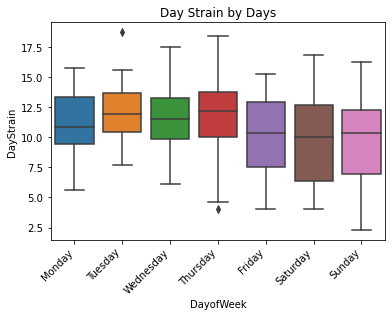

In [243]:
box = sns.boxplot(x = whoop_data['DayofWeek'],
            y = whoop_data['DayStrain'])
plt.xticks(rotation=45,ha='right')
plt.title('Day Strain by Days')

Text(0.5, 1.0, 'Sleeptime by Days')

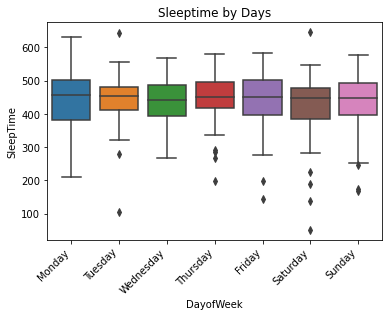

In [244]:
box = sns.boxplot(x = whoop_data['DayofWeek'],
            y = whoop_data['SleepTime'])
plt.xticks(rotation=45,ha='right')
plt.title('Sleeptime by Days')

Text(0.5, 1.0, 'Recovery Score by Days')

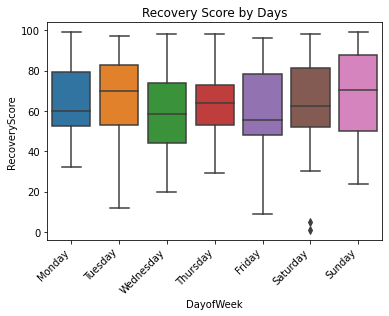

In [245]:
box = sns.boxplot(x = whoop_data['DayofWeek'],
            y = whoop_data['RecoveryScore'])
plt.xticks(rotation=45,ha='right')
plt.title('Recovery Score by Days')

Text(0, 0.5, 'Recovery Score')

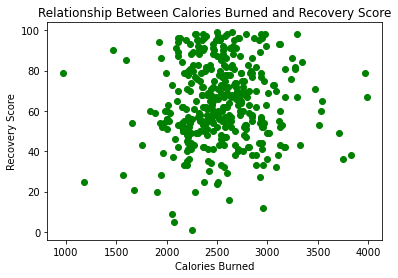

In [246]:
x = whoop_data['CaloriesBurned']
y = whoop_data['RecoveryScore']
plt.scatter(x, y,c='green')
plt.title('Relationship Between Calories Burned and Recovery Score')
plt.xlabel('Calories Burned')
plt.ylabel('Recovery Score')

Text(0.5, 1.0, 'Sleep Efficiency by Recovery Color')

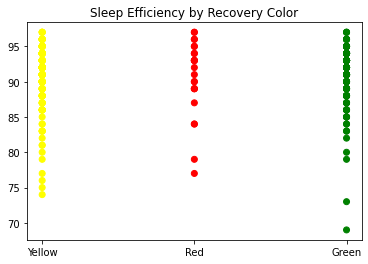

In [249]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='Red':
            cols.append('red')
        elif l=='Yellow':
            cols.append('yellow')
        else:
            cols.append('green')
    return cols
cols=pltcolor(x)
x = whoop_data['RecoveryColor']
y = whoop_data['SleepEfficiency']
plt.scatter(x, y,c=cols)

plt.title('Sleep Efficiency by Recovery Color')

Text(0.5, 1.0, 'Deep Sleep Time by Recovery Color')

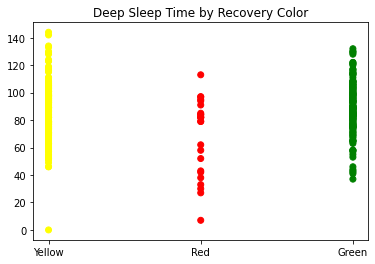

In [250]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='Red':
            cols.append('red')
        elif l=='Yellow':
            cols.append('yellow')
        else:
            cols.append('green')
    return cols
cols=pltcolor(x)
x = whoop_data['RecoveryColor']
y = whoop_data['DeepSleep']
plt.scatter(x, y,c=cols)

plt.title('Deep Sleep Time by Recovery Color')

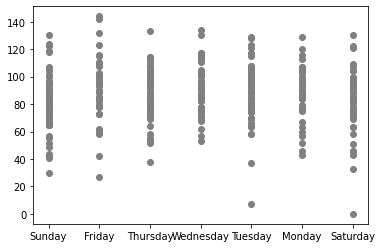

In [32]:
x = whoop_data['DayofWeek']
y = whoop_data['DeepSleep']
plt.scatter(x, y,c='Grey')

Text(0, 0.5, 'Daily Strain')

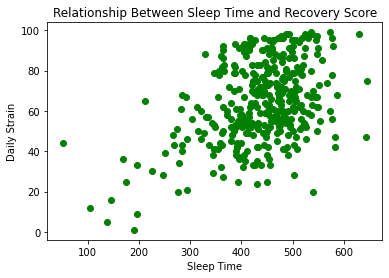

In [252]:
x = whoop_data['SleepTime']
y = whoop_data['RecoveryScore']
plt.scatter(x, y,c='green')
plt.title('Relationship Between Sleep Time and Recovery Score')
plt.xlabel('Sleep Time')
plt.ylabel('Daily Strain')

/Users/cinonbak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Average Day Strain by Day of Week')

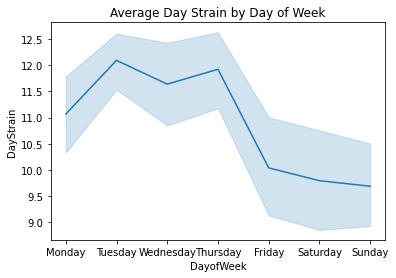

In [251]:
x = whoop_data['DayofWeek']
y = whoop_data['DayStrain']
sns.lineplot(x, y)
plt.title('Average Day Strain by Day of Week')

# Modeling

In [36]:
whoop_data.head()

,CycleStartTime,RecoveryScore,RHR,HRV,DayStrain,CaloriesBurned,MaxHR,AverageHR,SleepPerformance,RespiratoryRate,...,DeepSleep,REMSleep,AwakeTime,SleepNeed,SleepDebt,SleepEfficiency,Date,Day,DayofWeek,RecoveryColor
2,2022-08-28 02:01:00,41.0,55.0,49.0,12.1,2243.0,162.0,73.0,73.0,15.9,...,79.0,117.0,67.0,476.0,0.0,83.0,2022-08-28,6,Sunday,Yellow
3,2022-08-26 23:25:00,65.0,55.0,57.0,5.3,2289.0,135.0,66.0,100.0,15.9,...,93.0,172.0,80.0,475.0,0.0,86.0,2022-08-26,4,Friday,Yellow
4,2022-08-25 23:30:00,60.0,55.0,58.0,4.0,1833.0,108.0,64.0,100.0,16.3,...,103.0,181.0,86.0,478.0,0.0,87.0,2022-08-25,3,Thursday,Yellow
5,2022-08-24 22:13:00,20.0,62.0,42.0,7.1,2283.0,165.0,65.0,100.0,16.6,...,97.0,150.0,96.0,534.0,51.0,84.0,2022-08-24,2,Wednesday,Red
6,2022-08-23 23:37:00,36.0,61.0,45.0,9.3,2218.0,147.0,71.0,83.0,17.7,...,90.0,191.0,51.0,545.0,60.0,90.0,2022-08-23,1,Tuesday,Yellow


In [183]:
modeldata = whoop_data[['RHR','HRV','DayStrain','CaloriesBurned','MaxHR','AverageHR','SleepPerformance','RespiratoryRate','SleepTime','LightSleep','DeepSleep','REMSleep','AwakeTime','RecoveryFeeling']]

In [184]:
X = modeldata.drop(columns = 'RecoveryFeeling')
y = modeldata['RecoveryFeeling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [233]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf = clf.fit(X_train,y_train)

In [234]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [235]:
prediction = clf.predict(X_test)
prediction

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [236]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.926829268292683

In [237]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, prediction, labels=[0,1])

array([[ 12,   5],
       [  4, 102]])

In [238]:
feature_names = X.columns
feature_names

Index(['RHR', 'HRV', 'DayStrain', 'CaloriesBurned', 'MaxHR', 'AverageHR',
       'SleepPerformance', 'RespiratoryRate', 'SleepTime', 'LightSleep',
       'DeepSleep', 'REMSleep', 'AwakeTime'],
      dtype='object')

In [239]:
clf.feature_importances_

array([0.        , 0.47133452, 0.        , 0.        , 0.02953193,
       0.        , 0.        , 0.05176523, 0.28765429, 0.        ,
       0.04318759, 0.        , 0.11652644])

In [240]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0,ascending=False)
feature_importance

,0
HRV,0.471335
SleepTime,0.287654
AwakeTime,0.116526
RespiratoryRate,0.051765
DeepSleep,0.043188
MaxHR,0.029532
RHR,0.000000
DayStrain,0.000000
CaloriesBurned,0.000000
AverageHR,0.000000


<AxesSubplot:>

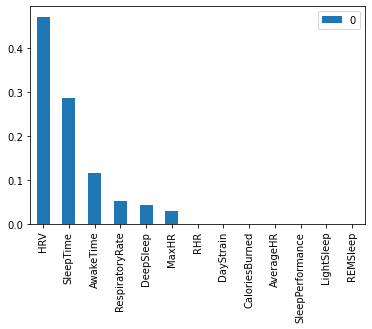

In [241]:
feature_importance.plot(kind='bar')

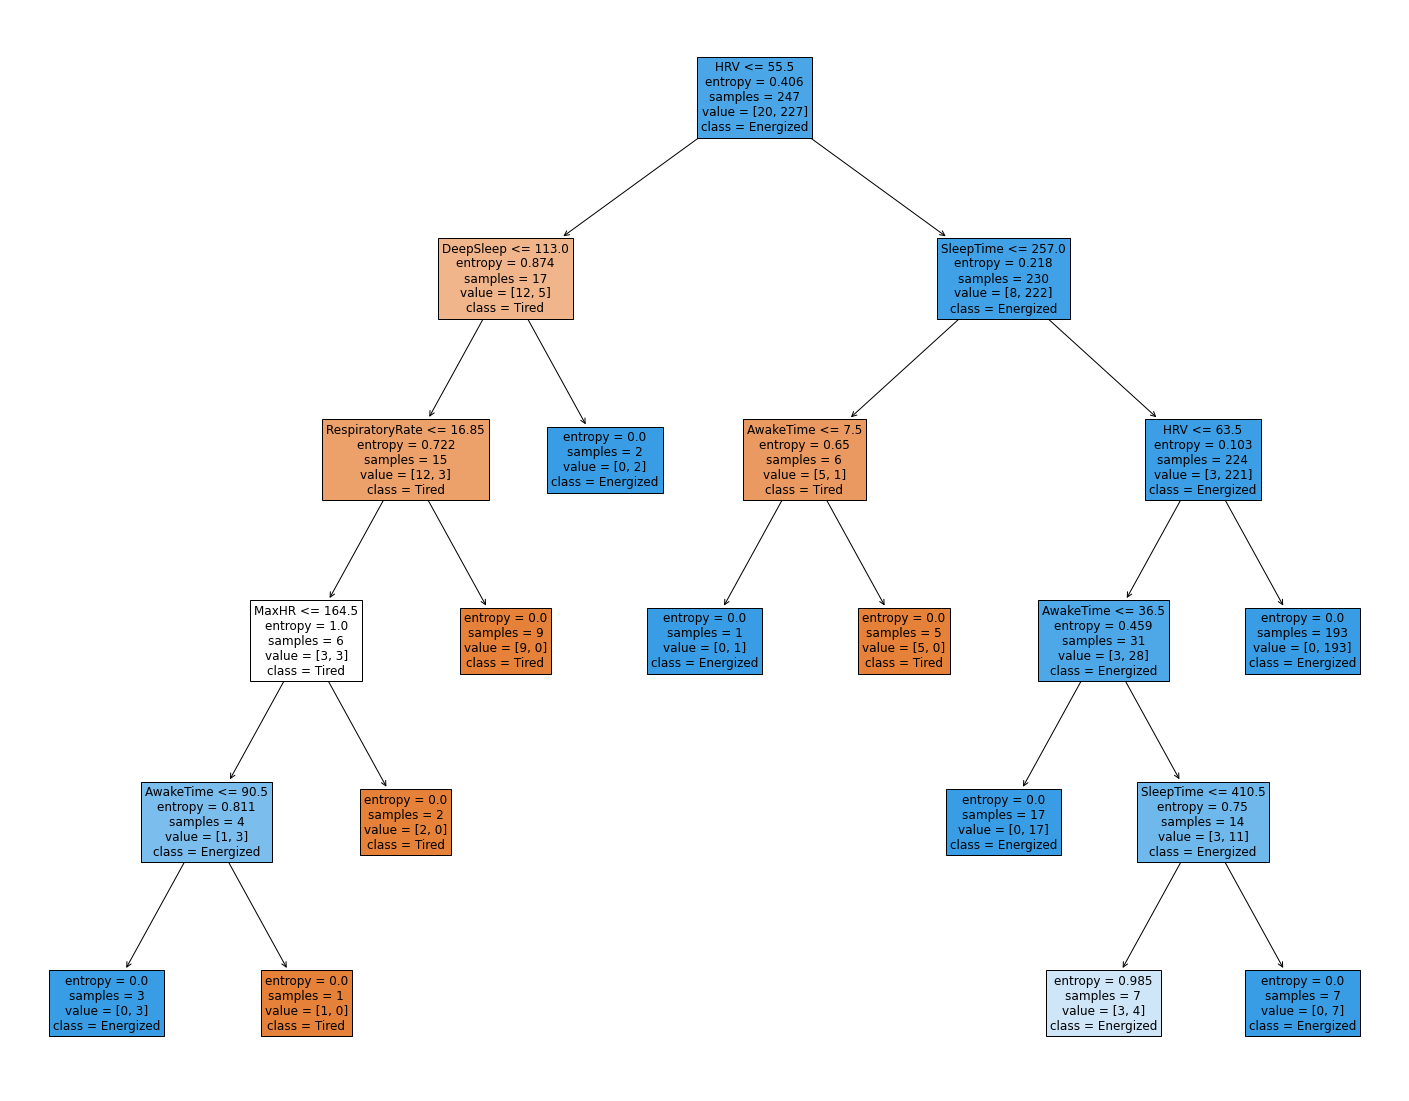

In [242]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names = feature_names, class_names={0:'Tired',1:'Energized'}, filled=True,fontsize=12)


    acc_gini  acc_entropy  max_depth
0   0.918699     0.910569          1
1   0.926829     0.926829          2
2   0.910569     0.926829          3
3   0.918699     0.918699          4
4   0.910569     0.943089          5
5   0.918699     0.943089          6
6   0.918699     0.918699          7
7   0.918699     0.902439          8
8   0.902439     0.894309          9
9   0.902439     0.894309         10
10  0.894309     0.926829         11
11  0.918699     0.926829         12
12  0.902439     0.902439         13
13  0.918699     0.910569         14
14  0.926829     0.926829         15
15  0.894309     0.894309         16
16  0.902439     0.934959         17
17  0.918699     0.902439         18
18  0.902439     0.943089         19
19  0.926829     0.926829         20
20  0.934959     0.894309         21
21  0.902439     0.894309         22
22  0.926829     0.894309         23
23  0.918699     0.951220         24
24  0.918699     0.894309         25
25  0.926829     0.894309         26
2

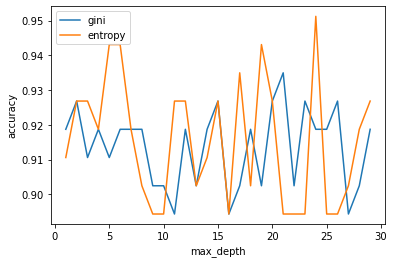

In [232]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print(d)

# Modeling 2 For Best Recovery

In [100]:
modeldatabest = whoop_data[['RHR','HRV','DayStrain','CaloriesBurned','MaxHR','AverageHR','SleepPerformance','RespiratoryRate','SleepTime','LightSleep','DeepSleep','REMSleep','AwakeTime','RecoveryBestFeeling']]

In [101]:
X = modeldatabest.drop(columns = 'RecoveryBestFeeling')
y = modeldatabest['RecoveryBestFeeling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [171]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X_train,y_train)

In [172]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [173]:
prediction = clf.predict(X_test)
prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [174]:
accuracy_score(y_test, prediction)

0.8699186991869918

In [175]:
confusion_matrix(y_test, prediction, labels=[0,1])

array([[101,   2],
       [ 14,   6]])

In [176]:
feature_names = X.columns
feature_names

Index(['RHR', 'HRV', 'DayStrain', 'CaloriesBurned', 'MaxHR', 'AverageHR',
       'SleepPerformance', 'RespiratoryRate', 'SleepTime', 'LightSleep',
       'DeepSleep', 'REMSleep', 'AwakeTime'],
      dtype='object')

In [177]:
clf.feature_importances_

array([0.        , 0.64221   , 0.        , 0.06282566, 0.        ,
       0.06875946, 0.09061421, 0.        , 0.        , 0.13559067,
       0.        , 0.        , 0.        ])

In [178]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0,ascending=False)
feature_importance

,0
HRV,0.642210
LightSleep,0.135591
SleepPerformance,0.090614
AverageHR,0.068759
CaloriesBurned,0.062826
RHR,0.000000
DayStrain,0.000000
MaxHR,0.000000
RespiratoryRate,0.000000
SleepTime,0.000000


<AxesSubplot:>

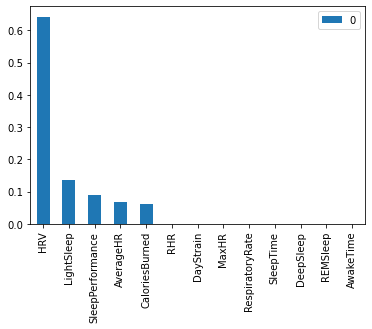

In [179]:
feature_importance.plot(kind='bar')

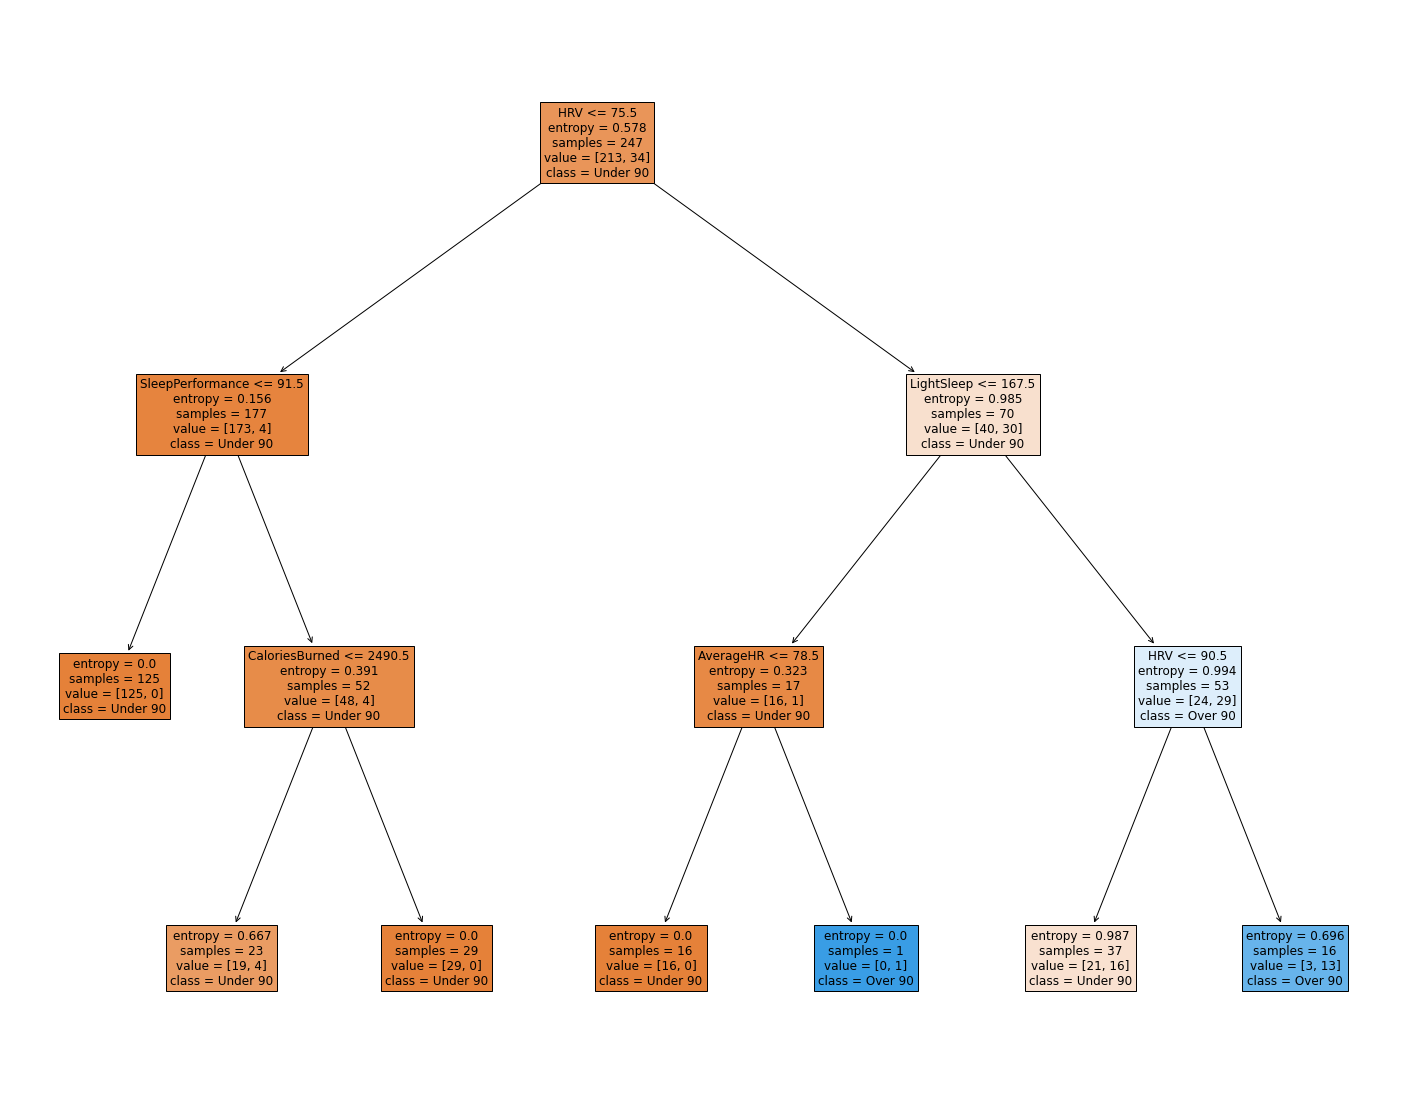

In [182]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names = feature_names, class_names={0:'Under 90',1:'Over 90'}, filled=True,fontsize=12)


    acc_gini  acc_entropy  max_depth
0   0.837398     0.837398          1
1   0.804878     0.796748          2
2   0.804878     0.869919          3
3   0.861789     0.804878          4
4   0.813008     0.861789          5
5   0.796748     0.796748          6
6   0.739837     0.813008          7
7   0.796748     0.796748          8
8   0.731707     0.837398          9
9   0.764228     0.804878         10
10  0.764228     0.796748         11
11  0.739837     0.813008         12
12  0.731707     0.821138         13
13  0.747967     0.813008         14
14  0.739837     0.796748         15
15  0.739837     0.813008         16
16  0.747967     0.804878         17
17  0.804878     0.788618         18
18  0.747967     0.804878         19
19  0.788618     0.821138         20
20  0.764228     0.804878         21
21  0.731707     0.804878         22
22  0.739837     0.796748         23
23  0.739837     0.804878         24
24  0.756098     0.821138         25
25  0.788618     0.829268         26
2

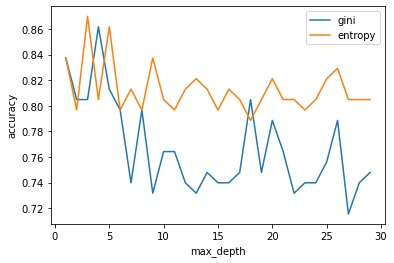

In [170]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print(d)